<div style="font-size:16px; color:darkblue;">
    https://www.kaggle.com/jtrofe/beer-recipes
</div>

<div style="font-size:16px; color:darkblue;">
    BeerID - Record ID<br/>
    Name - Name<br/>
    URL - Location of recipe webpage at https://www.brewersfriend.com<br/>
    Style - Type of brew<br/>
    StyleID - Numeric ID for type of brew<br/>
    Size(L) - Amount brewed for recipe listed<br/>
    OG - Specific gravity of wort before fermentation<br/>
    FG - Specific gravity of wort after fermentation<br/>
    ABV - Alcohol By Volume<br/>
    IBU - International Bittering Units<br/>
    Color - Standard Reference Method - light to dark ex. 40 = black<br/>
    BoilSize - Fluid at beginning of boil<br/>
    BoilTime - Time wort is boiled<br/>
    BoilGravity - Specific gravity of wort before the boil<br/>
    Efficiency - Beer mash extraction efficiency - extracting sugars from the grain during mash<br/>
    MashThickness - Amount of water per pound of grain<br/>
    SugarScale - Scale to determine the concentration of dissolved solids in wort<br/>
    BrewMethod - Various techniques for brewing<br/>
    PitchRate - Yeast added to the fermentor per gravity unit - M cells/ml/deg P<br/>
    PrimaryTemp - Temperature at the fermenting stage<br/>
    PrimingMethod - Priming method used, e.g., corn sugar<br/>
    PrimingAmount - Amount of priming sugar used<br/>
    UserId
</div>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import statsmodels.formula.api as sm
import scipy.stats as stats
import collections
import wordcloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

pylab.rcParams['figure.figsize'] = (10, 6)
pd.options.display.max_rows = 20
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [57]:
#!type recipeData.csv

In [58]:
df = pd.read_csv ('recipeData.csv')
df

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0
5,6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,...,1.047,79.0,NaN,Specific Gravity,All Grain,1.00,NaN,NaN,NaN,5889.0
6,7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-plin...,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,...,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,1051.0
7,8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,Cream Ale,45,20.82,1.054,1.014,5.36,19.97,...,1.040,70.0,1.4,Specific Gravity,All Grain,NaN,NaN,corn sugar,4.2 oz,116.0
8,9,Chocolate Vanilla Porter,/homebrew/recipe/view/29265/chocolate-vanilla-...,Robust Porter,129,22.71,1.060,1.016,5.77,31.63,...,1.042,73.0,NaN,Specific Gravity,All Grain,NaN,NaN,corn sugar,4 oz,116.0
9,10,Mango Habanero IPA,/homebrew/recipe/view/61082/mango-habanero-ipa,Imperial IPA,86,20.82,1.080,1.017,8.22,93.02,...,1.058,70.0,NaN,Specific Gravity,All Grain,NaN,21.11,Corn Sugar,4.6 oz / .66 C,NaN


In [59]:
df.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate',
       'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

In [60]:
df.shape

(73861, 23)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73861 entries, 0 to 73860
Data columns (total 23 columns):
BeerID           73861 non-null int64
Name             73860 non-null object
URL              73861 non-null object
Style            73265 non-null object
StyleID          73861 non-null int64
Size(L)          73861 non-null float64
OG               73861 non-null float64
FG               73861 non-null float64
ABV              73861 non-null float64
IBU              73861 non-null float64
Color            73861 non-null float64
BoilSize         73861 non-null float64
BoilTime         73861 non-null int64
BoilGravity      70871 non-null float64
Efficiency       73861 non-null float64
MashThickness    43997 non-null float64
SugarScale       73861 non-null object
BrewMethod       73861 non-null object
PitchRate        34609 non-null float64
PrimaryTemp      51199 non-null float64
PrimingMethod    6766 non-null object
PrimingAmount    4774 non-null object
UserId           23371 non

In [62]:
df.describe()

,BeerID,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
count,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,73861.000000,70871.000000,73861.000000,43997.000000,34609.000000,51199.000000,23371.000000
mean,36931.000000,60.179432,43.929775,1.406266,1.075865,6.136865,44.276186,13.404989,49.724919,65.074870,1.353955,66.354881,2.127235,0.750468,19.175641,43078.069188
std,21321.978453,56.811462,180.373492,2.196908,0.432524,1.883510,42.945508,11.944511,193.246427,15.024228,1.930989,14.091686,1.682347,0.394262,4.219676,27734.252556
min,1.000000,1.000000,1.000000,1.000000,-0.003000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.780000,49.000000
25%,18466.000000,10.000000,18.930000,1.051000,1.011000,5.080000,23.370000,5.170000,20.820000,60.000000,1.040000,65.000000,1.500000,0.350000,18.000000,20984.000000
50%,36931.000000,35.000000,20.820000,1.058000,1.013000,5.790000,35.770000,8.440000,27.440000,60.000000,1.047000,70.000000,1.500000,0.750000,20.000000,42897.000000
75%,55396.000000,111.000000,23.660000,1.069000,1.017000,6.830000,56.380000,16.790000,30.000000,60.000000,1.060000,75.000000,3.000000,1.000000,20.000000,57841.000000
max,73861.000000,176.000000,9200.000000,34.034500,23.424600,54.720000,3409.300000,186.000000,9700.000000,240.000000,52.600000,100.000000,100.000000,2.000000,114.000000,134362.000000


<div style="font-size:16px; color:darkblue;">
    This is a dataset of 75,000 homebrewed beers with over 176 different styles.<br/>
    Beer records are user-reported and are classified according to one of the 176 different styles.<br/>
    These recipes go into as much or as little detail as the user provided, but there's are least 
    5 useful columns where data was entered for each: Original Gravity, Final Gravity, ABV, IBU, 
    and Color
</div>

<div style="font-size:16px; color:darkblue;">
    What goes into homemade beer?<br/>
    It would be interesting to see if the data provided is enough to define each class or if there 
    are undiscovered patterns. In the future it might be possible to go through and scrape more 
    detailed information for each recipe, such as the yeast and specific hops used.
</div>

In [63]:
df = df.drop('URL', axis=1)

In [64]:
df = df.drop('BeerID', axis=1)

In [65]:
df = df.drop('UserId', axis=1)

In [66]:
df

,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
0,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
1,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
2,Zombie Dust Clone - EXTRACT,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
3,Zombie Dust Clone - ALL GRAIN,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
4,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l
5,Sierra Nevada Pale Ale Clone,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,Specific Gravity,All Grain,1.00,NaN,NaN,NaN
6,Russian River Pliny the Elder (original),Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
7,Spotted Clown (New Glarus Spotted Cow clone),Cream Ale,45,20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,1.040,70.0,1.4,Specific Gravity,All Grain,NaN,NaN,corn sugar,4.2 oz
8,Chocolate Vanilla Porter,Robust Porter,129,22.71,1.060,1.016,5.77,31.63,34.76,30.28,75,1.042,73.0,NaN,Specific Gravity,All Grain,NaN,NaN,corn sugar,4 oz
9,Mango Habanero IPA,Imperial IPA,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,NaN,Specific Gravity,All Grain,NaN,21.11,Corn Sugar,4.6 oz / .66 C


In [67]:
df.isnull().sum()

Name                 1
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
dtype: int64

In [68]:
df.loc[df['Style'].isnull()]

,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
38,Rochefort 8 Clone,NaN,111,18.93,1.079,1.019,7.90,0.00,29.40,24.26,60,NaN,65.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
87,Zatarain's Root Beer - Non-Alcoholic keg in...,NaN,111,18.93,1.046,1.013,4.27,0.00,3.99,11.36,0,1.077,100.0,NaN,Specific Gravity,BIAB,NaN,NaN,NaN,NaN
192,Hop Cliff,NaN,111,18.93,1.093,1.023,9.12,0.00,14.07,18.93,60,NaN,75.0,NaN,Specific Gravity,Partial Mash,NaN,NaN,NaN,NaN
347,Mosaic IPL,NaN,111,20.82,1.063,1.016,6.16,68.35,7.67,28.39,60,NaN,78.0,NaN,Specific Gravity,All Grain,2.00,10.00,NaN,NaN
577,Nanny state,NaN,111,20.00,1.008,1.006,0.30,55.43,11.39,25.00,60,1.006,70.0,3.00,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
816,New world XII (westvleteren 12 clone),NaN,111,20.82,1.105,1.024,10.67,49.40,25.37,28.39,90,NaN,75.0,NaN,Specific Gravity,All Grain,1.00,27.78,NaN,NaN
944,Australian IPA,NaN,111,18.93,1.053,1.015,5.05,46.43,9.92,9.46,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
1002,Maris Otter sMasH,NaN,111,23.00,1.048,1.014,4.56,31.09,5.56,28.50,90,NaN,70.0,NaN,Specific Gravity,BIAB,NaN,20.00,NaN,NaN
1107,Quilter's Irish Death Clone,NaN,111,18.93,1.071,1.018,6.93,0.00,18.67,18.93,60,NaN,75.0,1.25,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
1178,Heimeøl,NaN,111,25.00,1.078,1.019,7.64,0.00,3.60,1.00,0,NaN,0.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN


<div style="font-size:16px; color:darkblue;">
     The 596 null style rows are dropped because their style id is 111 which is null.
</div>

<div style="font-size:16px; color:darkblue;">
    The single null name entry is removed since names are analyzed below.
</div>

In [69]:
dfStyle = pd.read_csv('styleData.csv')
pd.options.display.max_rows = len(dfStyle)
dfStyle

,Style,StyleID
0,Altbier,1
1,Alternative Grain Beer,2
2,Alternative Sugar Beer,3
3,American Amber Ale,4
4,American Barleywine,5
5,American Brown Ale,6
6,American IPA,7
7,American Lager,8
8,American Light Lager,9
9,American Pale Ale,10


In [70]:
dfStyle.loc[dfStyle['StyleID']==111]

,Style,StyleID
110,NaN,111


In [71]:
df = df[df['Style'].notnull()]
df = df[df['Name'].notnull()]

In [72]:
df.isnull().sum()

Name                 0
Style                0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2748
Efficiency           0
MashThickness    29492
SugarScale           0
BrewMethod           0
PitchRate        38777
PrimaryTemp      22296
PrimingMethod    66520
PrimingAmount    68510
dtype: int64

In [73]:
100*df['PrimingAmount'].isnull().sum()/len(df)

93.51113780301375

In [74]:
100*df['PrimingMethod'].isnull().sum()/len(df)

90.79493339157021

<div style="font-size:16px; color:darkblue;">
    PrimingMethod and PrimingAmount have more than 90% missing data, so it is better to drop these features.
</div>

In [75]:
dfClean = df.drop(['PrimingMethod','PrimingAmount'],axis=1)

In [76]:
dfClean.isnull().sum()

Name                 0
Style                0
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2748
Efficiency           0
MashThickness    29492
SugarScale           0
BrewMethod           0
PitchRate        38777
PrimaryTemp      22296
dtype: int64

<div style="font-size:16px; color:darkblue;">
    Using Yunzhu's method fill in missing value with medians.
</div>

In [77]:
dfClean['BoilGravity'].fillna(dfClean['BoilGravity'].median(),inplace=True)
dfClean['MashThickness'].fillna(dfClean['MashThickness'].median(),inplace=True)
dfClean['PitchRate'].fillna(dfClean['PitchRate'].median(),inplace=True)
dfClean['PrimaryTemp'].fillna(dfClean['PrimaryTemp'].median(),inplace=True)

In [78]:
dfClean.isnull().sum()

Name             0
Style            0
StyleID          0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
Efficiency       0
MashThickness    0
SugarScale       0
BrewMethod       0
PitchRate        0
PrimaryTemp      0
dtype: int64

<div style="font-size:16px; color:darkblue;">
    https://www.brewersfriend.com/abv-calculator/ (\*)<br/>
    https://www.brewersfriend.com/brix-converter/ (\*\*)<br/>
    If we pay attention to SugarScale column, the data for 'OG' and 'FG' has two different scale, 'Specific Gravity' and 'Plato'<br/>
    We need to convert all 'OG' and 'FG' data to one scale for the regression model to train correctly
    I borrowed the formula from the links above (\*)(\*\*)<br/>
    Conversion from 'PLATO' to 'Specific Gravity'
</div>

In [79]:
def plTOsg(PL):
    SG = (PL / (258.6-((PL / 258.2)*227.1))) + 1
    return SG

In [80]:
plTOsg(22)

1.0919540676449373

In [81]:
idx = dfClean[dfClean['SugarScale'] == 'Plato'].index

In [82]:
dfClean[dfClean['SugarScale'] == 'Plato'][['OG','FG']]

,OG,FG
37,13.96180,3.48530
272,15.04280,3.75321
273,13.18740,3.61072
418,16.61310,4.33412
419,15.41020,4.48111
480,13.47280,3.10738
485,23.68390,5.83082
546,19.52740,3.71451
555,13.12230,2.58355
590,14.02950,2.64942


In [83]:
dfClean.loc[idx,['OG','FG']] = dfClean[dfClean['SugarScale'] == 'Plato'][['OG','FG']].apply(plTOsg)

In [84]:
dfClean[dfClean['SugarScale'] == 'Plato'][['OG','FG']]

,OG,FG
37,1.056682,1.013639
272,1.061307,1.014701
273,1.053390,1.014136
418,1.068090,1.017011
419,1.062887,1.017597
480,1.054601,1.012145
485,1.099609,1.023004
546,1.080884,1.014548
555,1.053114,1.010079
590,1.056970,1.010338


In [85]:
dfClean.head()

,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
0,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,1.5,Specific Gravity,All Grain,0.75,17.78
1,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,1.5,Specific Gravity,All Grain,0.75,20.00
2,Zombie Dust Clone - EXTRACT,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.047,70.0,1.5,Specific Gravity,extract,0.75,20.00
3,Zombie Dust Clone - ALL GRAIN,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.047,70.0,1.5,Specific Gravity,All Grain,0.75,20.00
4,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,1.5,Specific Gravity,All Grain,0.75,19.00


In [86]:
dfClean.loc[idx,['SugarScale']]='Specific Gravity'

In [87]:
dfClean[dfClean['SugarScale'] == 'Plato'].count()

Name             0
Style            0
StyleID          0
Size(L)          0
OG               0
FG               0
ABV              0
IBU              0
Color            0
BoilSize         0
BoilTime         0
BoilGravity      0
Efficiency       0
MashThickness    0
SugarScale       0
BrewMethod       0
PitchRate        0
PrimaryTemp      0
dtype: int64

<div style="font-size:16px; color:darkblue;">
These are not Beer!<br/>
Cider is an alcoholic drink made from fermented crushed fruit, typically apples.<br/>
Wine is an alcoholic drink made from fermented grape juice.<br/>
Melomel is mead comprised of honey and fruit.<br/>
Metheglin is a spiced or medicated variety of mead, associated particularly with Wales.<br/>
Mead is made from honey and water via fermentation with yeast.<br/>
By inspecting the 176 different styles we were able to identify and eliminate the records which are not beers!<br/>
The mixed data will act as noise in our analysis, either by eroding the results or representing as outliers.
</div>


In [88]:
dfClean[dfClean['Style'].str.contains("Cider")==True].head(5)

,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
222,Heavy Hard Cherry Apple Cider,English Cider,64,18.93,1.063,1.001,8.11,0.00,7.17,18.93,60,1.047,70.0,1.5,Specific Gravity,extract,0.75,20.00
225,Pineapple Cider,Fruit Cider,76,20.82,1.047,1.012,4.59,1.19,11.54,28.39,0,1.034,85.0,1.5,Specific Gravity,All Grain,0.75,21.11
363,Hard Cider,Common Cider,44,22.71,1.041,1.004,4.89,0.00,8.67,22.71,0,1.041,75.0,1.5,Specific Gravity,All Grain,1.00,20.00
395,Cider,English Cider,64,8.06,1.045,1.001,5.81,0.00,3.70,7.57,60,1.047,70.0,1.5,Specific Gravity,extract,0.75,20.00
512,Jimmie's Graff version 1,Other Specialty Cider or Perry,121,18.93,1.230,1.023,27.12,2.62,22.96,17.03,90,1.047,75.0,1.5,Specific Gravity,All Grain,0.75,20.00


In [89]:
idx = dfClean[dfClean['Style'].str.contains("Cider")==True].index
idx

Int64Index([  222,   225,   363,   395,   512,   722,   730,   831,   832,
             1082,
            ...
            70031, 70248, 70798, 71425, 71441, 72087, 72638, 72746, 73137,
            73528],
           dtype='int64', length=191)

In [90]:
dfClean=dfClean.drop(idx)

In [91]:
dfClean[dfClean['Style'].str.contains(" Wine")==True].head(5)

,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
1844,FB Cider,Apple Wine,16,18.93,1.085,1.008,10.01,0.0,4.80,18.93,60,1.085,100.0,1.5,Specific Gravity,extract,0.75,18.89
6458,#52 Banana wine,Apple Wine,16,20.00,1.041,1.008,4.34,0.0,5.29,28.50,60,1.029,80.0,3.0,Specific Gravity,All Grain,0.75,20.00
8243,Mead hard apple cider,Apple Wine,16,3.79,1.084,1.021,8.27,45.3,3.86,3.79,15,1.084,35.0,1.5,Specific Gravity,extract,0.75,20.00
11461,Applewine,Apple Wine,16,10.00,1.084,1.021,8.97,0.0,0.00,12.00,60,1.070,60.0,2.8,Specific Gravity,All Grain,0.75,20.00
17857,Pomona's Blessing,Apple Wine,16,22.71,1.115,1.013,13.36,0.0,16.70,9.46,60,1.276,35.0,1.5,Specific Gravity,extract,0.75,22.22


In [92]:
idx = dfClean[dfClean['Style'].str.contains(" Wine") == True].index
idx

Int64Index([1844, 6458, 8243, 11461, 17857, 57257], dtype='int64')

In [93]:
dfClean=dfClean.drop(idx)

In [94]:
dfClean[dfClean['Style'].str.contains("Melomel")==True].head(5)

,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
281,Apple Cyser with Cherries Mead,Cyser (Apple Melomel),46,3.79,1.156,1.031,16.38,0.0,6.74,3.79,1,1.047,100.0,1.5,Specific Gravity,All Grain,0.75,20.0
565,Lingonberry Mead,Other Fruit Melomel,119,3.79,1.104,1.002,13.38,0.0,13.20,3.79,1,1.047,100.0,1.5,Specific Gravity,All Grain,0.75,20.0
741,Cranberry Mead,Other Fruit Melomel,119,3.79,1.083,1.002,10.68,0.0,12.82,3.79,1,1.047,100.0,1.5,Specific Gravity,All Grain,0.75,20.0
1171,Liquid Mistletoe,Cyser (Apple Melomel),46,20.82,1.138,1.035,13.63,0.0,6.59,26.50,60,1.047,70.0,1.5,Specific Gravity,All Grain,0.75,20.0
1340,Kumquat Mead,Other Fruit Melomel,119,3.79,1.092,1.002,11.88,0.0,4.12,3.79,1,1.047,100.0,1.5,Specific Gravity,All Grain,0.75,20.0


In [95]:
idx = dfClean[dfClean['Style'].str.contains("Melomel")==True].index
idx

Int64Index([  281,   565,   741,  1171,  1340,  1359,  1472,  1679,  2031,
             2832,  3230,  3279,  3570,  4000,  5428,  5801,  6043,  6185,
             6760,  6847,  7274,  7799,  8103,  8388,  8854,  9845, 10309,
            10476, 11771, 11834, 12338, 12393, 12540, 12801, 13007, 15671,
            15992, 16984, 17792, 17870, 18413, 19563, 20650, 21474, 21542,
            21618, 22383, 22606, 23243, 24596, 25176, 26512, 26902, 28925,
            29097, 29358, 29523, 30282, 30472, 30821, 31352, 31469, 34168,
            34779, 34831, 35588, 37061, 39147, 40762, 41188, 42972, 44547,
            51950, 55641, 56317, 57829, 63099, 63124, 63606, 68755, 70778,
            70813, 70919, 73488, 73489],
           dtype='int64')

In [96]:
dfClean=dfClean.drop(idx)

In [97]:
dfClean[dfClean['Style'].str.contains("Metheglin") == True].head(5)

,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
285,Elder Flower Rose Hips Chamomile Mead,Metheglin,104,22.71,1.098,1.005,12.22,0.0,4.29,22.71,1,1.047,100.0,1.5,Specific Gravity,All Grain,0.75,20.0
450,Orange/Cinnamon/Vanilla Metheglin,Metheglin,104,18.93,1.134,1.034,13.23,0.0,5.33,9.46,10,1.047,100.0,1.5,Specific Gravity,All Grain,0.75,20.0
1786,Rasberry Ginger Orange Blossom Mead,Metheglin,104,22.71,1.104,1.001,13.51,0.0,12.04,22.71,1,1.047,100.0,1.5,Specific Gravity,All Grain,0.75,20.0
2487,Christmas Spiced Mead,Metheglin,104,3.79,1.154,1.035,15.68,0.0,15.05,3.79,0,1.154,90.0,1.5,Specific Gravity,All Grain,0.50,20.0
2770,Orange Blossom Lavander mead,Metheglin,104,22.71,1.098,1.001,12.73,0.0,4.29,22.71,1,1.047,100.0,1.5,Specific Gravity,All Grain,0.75,20.0


In [98]:
idx = dfClean[dfClean['Style'].str.contains("Metheglin") == True].index
idx

Int64Index([  285,   450,  1786,  2487,  2770,  7662,  8874, 10084, 10094,
            11083, 11979, 14225, 38075, 48052],
           dtype='int64')

In [99]:
dfClean=dfClean.drop(idx)

In [100]:
dfClean[dfClean['Style'].str.contains("Mead") == True].head(5)

,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
632,Tupelo Honey Sparkling Show Mead (Saffron)...,Dry Mead,57,18.93,1.109,1.005,13.62,0.00,3.02,18.93,1,1.047,100.0,1.5,Specific Gravity,All Grain,0.75,20.00
861,Sack Mead Polish,Sweet Mead,161,3.79,1.147,1.006,18.52,0.00,5.67,3.79,1,1.047,100.0,1.5,Specific Gravity,All Grain,0.75,20.00
1292,My first BOMM (mead),Dry Mead,57,8.33,1.115,1.027,11.43,0.00,4.78,8.33,0,1.115,0.0,1.5,Specific Gravity,extract,0.75,19.44
1474,Til We Mead Again,Semi-Sweet Mead,142,20.82,1.129,1.006,16.07,0.00,7.77,20.82,15,1.047,35.0,1.5,Specific Gravity,extract,0.75,20.00
1698,EBH MSB: Marcus' Stupid Bitter,Open Category Mead,117,20.82,1.015,1.004,1.44,11.15,2.81,11.36,20,1.047,65.0,1.5,Specific Gravity,extract,0.75,20.00


In [101]:
idx = dfClean[dfClean['Style'].str.contains("Mead") == True].index
idx

Int64Index([  632,   861,  1292,  1474,  1698,  1913,  1930,  2011,  2248,
             2325,
            ...
            70017, 70103, 70443, 71560, 71563, 72089, 72990, 73109, 73200,
            73513],
           dtype='int64', length=180)

In [102]:
dfClean=dfClean.drop(idx)

In [103]:
len(dfClean)

72788

<div style="font-size:16px; color:darkblue;">
    Scatter plots and heat maps to see correlations in data before correcting the Sugarscale and detecting the non-beer styles.
</div>

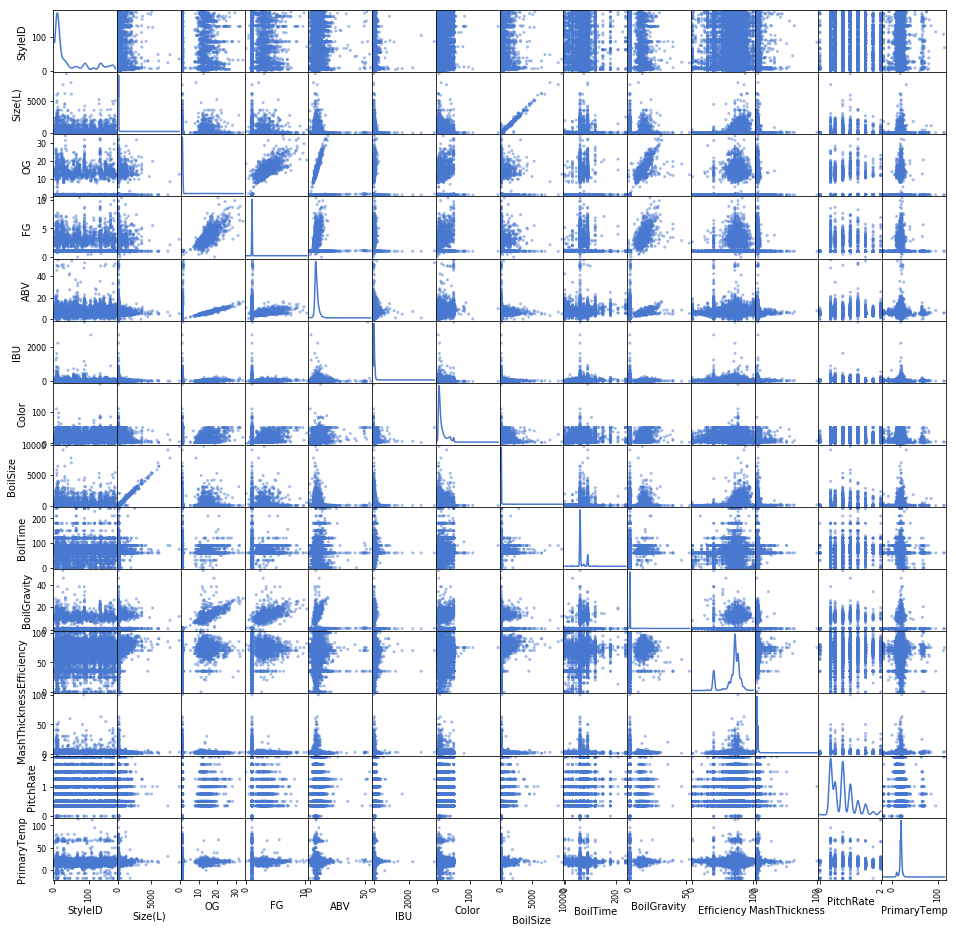

In [332]:
#This takes some time to load.
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(16, 16));

<div style="font-size:16px; color:darkblue;">
    Scatter plots and heat maps to see correlations in data.
</div>

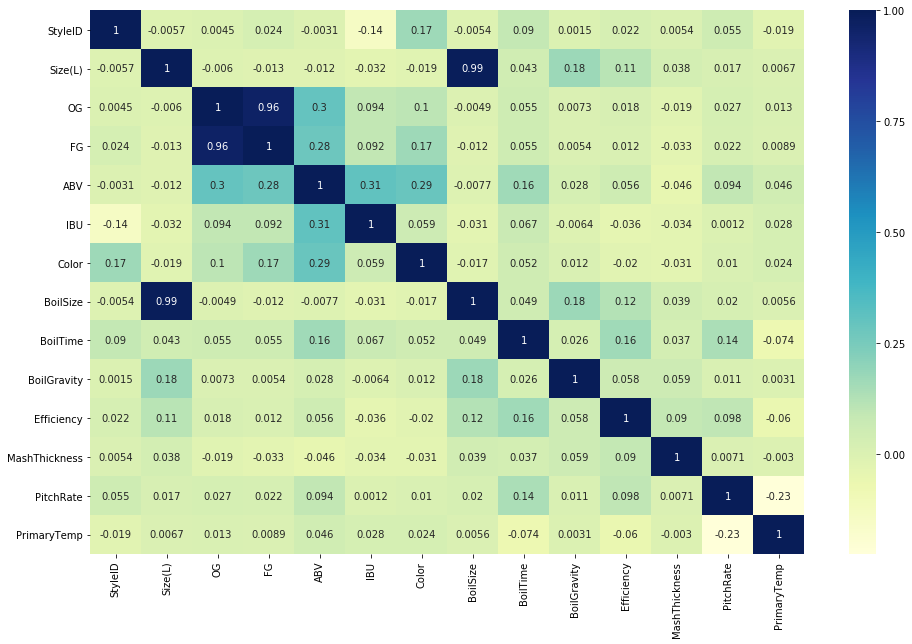

In [305]:
plt.subplots(figsize=(16, 10))
sns.heatmap(dfClean.corr(), annot=True, cmap="YlGnBu")
plt.show()

<div style="font-size:16px; color:darkblue;">
    Common Styles.
</div>

Style
American IPA            16.403803
American Pale Ale       10.415178
Saison                   3.595373
American Light Lager     3.128263
American Amber Ale       2.799912
Blonde Ale               2.406990
Imperial IPA             2.030554
American Stout           1.742045
Irish Red Ale            1.654119
American Brown Ale       1.582678
Name: Name, dtype: float64


Text(0.5,1,'% Frequency of top 10 styles in data')

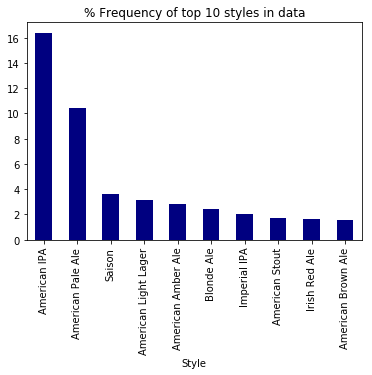

In [55]:
top_10_styles = dfClean.groupby('Style').count()['Name'].sort_values(ascending=False)[0:10]
top_10_styles = 100 * (top_10_styles/len(dfClean))
print(top_10_styles)
top_10_styles.plot.bar(x='Style', y='% Frequency', color='navy')
plt.title('% Frequency of top 10 styles in data')

Text(0.5,1,'% Frequency of top 10 general styles in data')

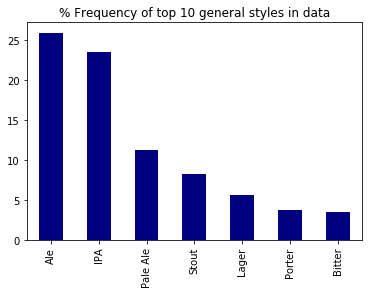

In [56]:
general_styles = ['Ale', 'IPA', 'Pale Ale', 'Lager', 'Stout', 'Bitter', 'Porter']
top_10_general_styles = pd.Series()
for style in general_styles:
    top_10_general_styles = top_10_general_styles.append(pd.Series(
        {style: dfClean['Style'].str.contains(style).sum()}))

top_10_general_styles = top_10_general_styles.sort_values(ascending=False)[0:10]
top_10_general_styles = 100 * (top_10_general_styles/len(dfClean))
top_10_general_styles.plot.bar(x='General Style', y='% Frequency', color='navy')
plt.title('% Frequency of top 10 general styles in data')

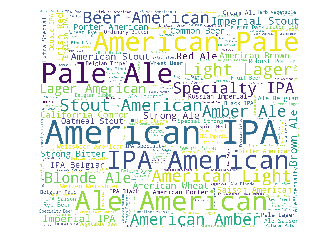

In [57]:
wordcloud_style = wordcloud.WordCloud(background_color='white',
                                      width=1200,height=1000).generate(' '.join(dfClean['Style']))


plt.imshow(wordcloud_style)
plt.axis('off')
plt.show()

<div style="font-size:16px; color:darkblue;">
    General distributions.
</div>

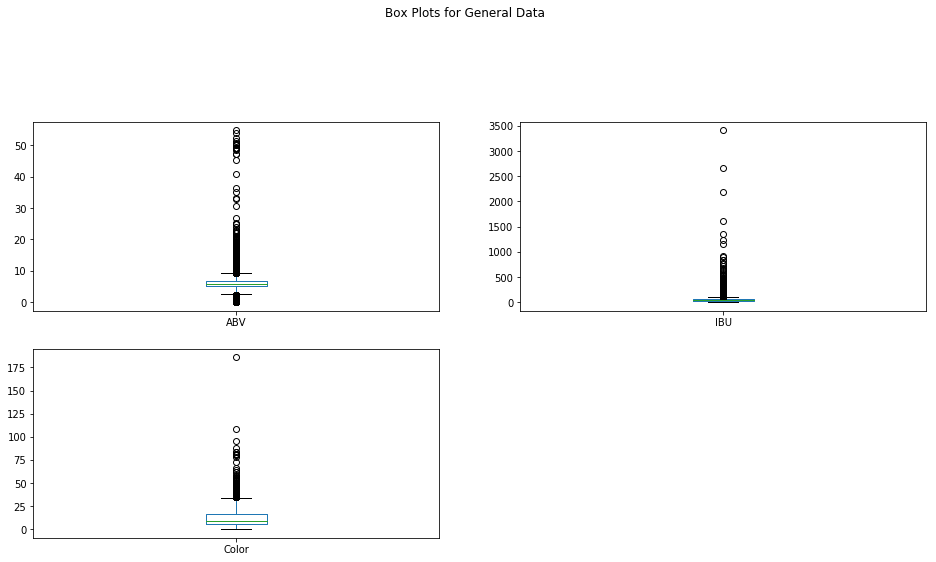

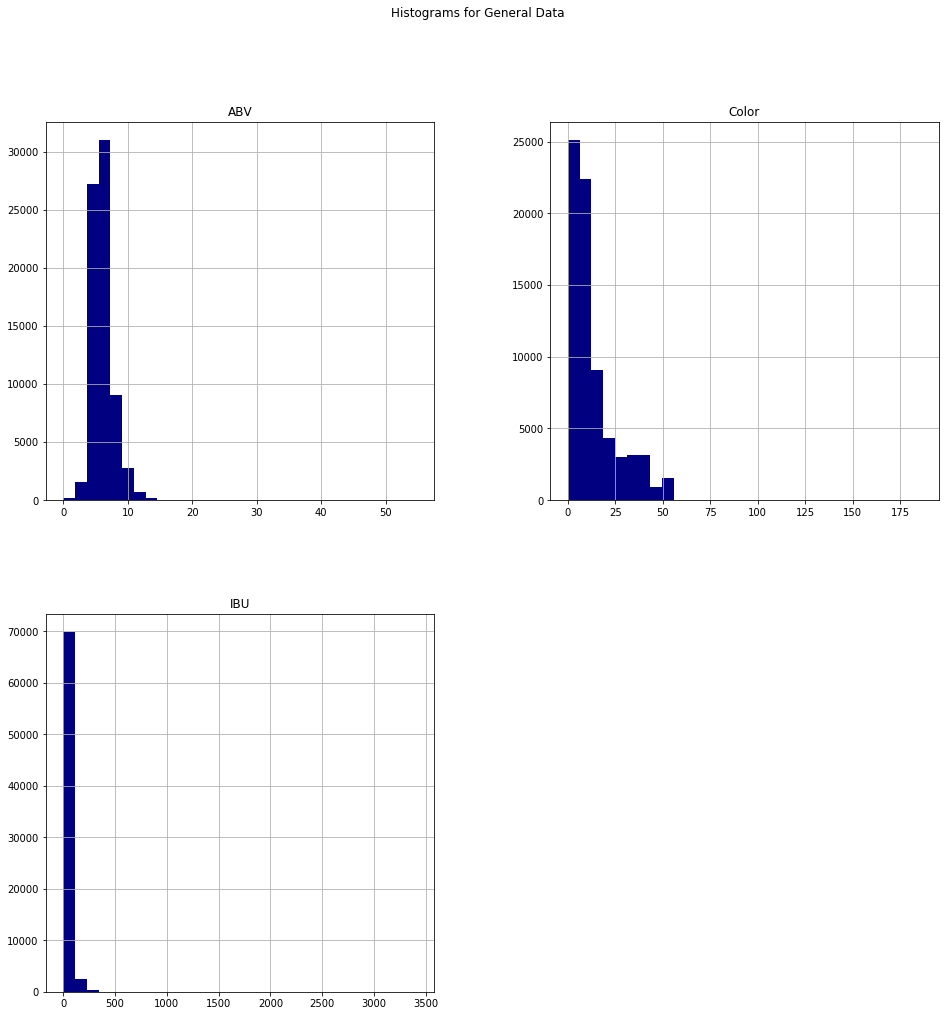

In [58]:
dfNumeric = dfClean[['ABV', 'IBU', 'Color']]
dfNumeric.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False, figsize=(16,16), 
               title='Box Plots for General Data')
dfNumeric.hist(bins=30, figsize=(16,16), color='navy')
plt.suptitle('Histograms for General Data')
plt.show()

<div style="font-size:16px; color:darkblue;">
    Individual style disributions.
</div>

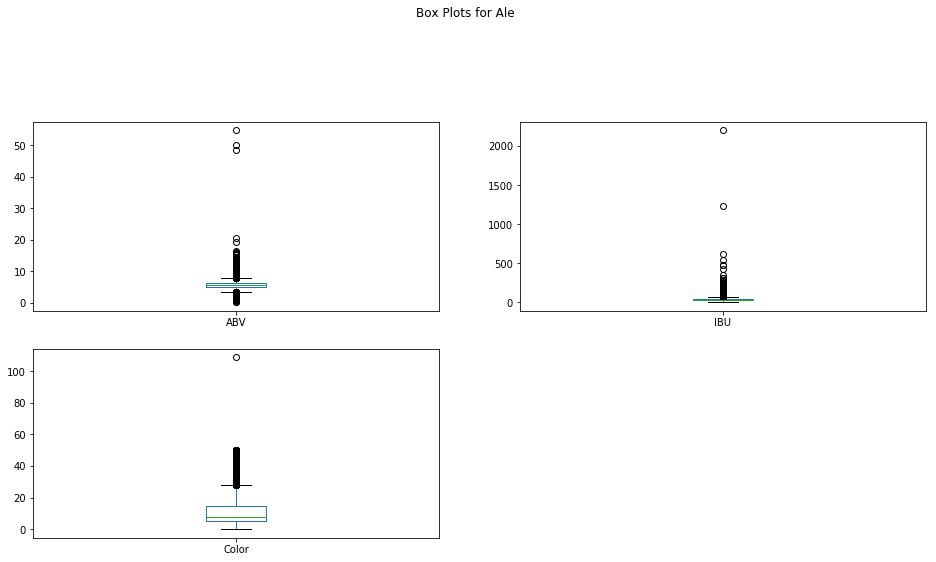

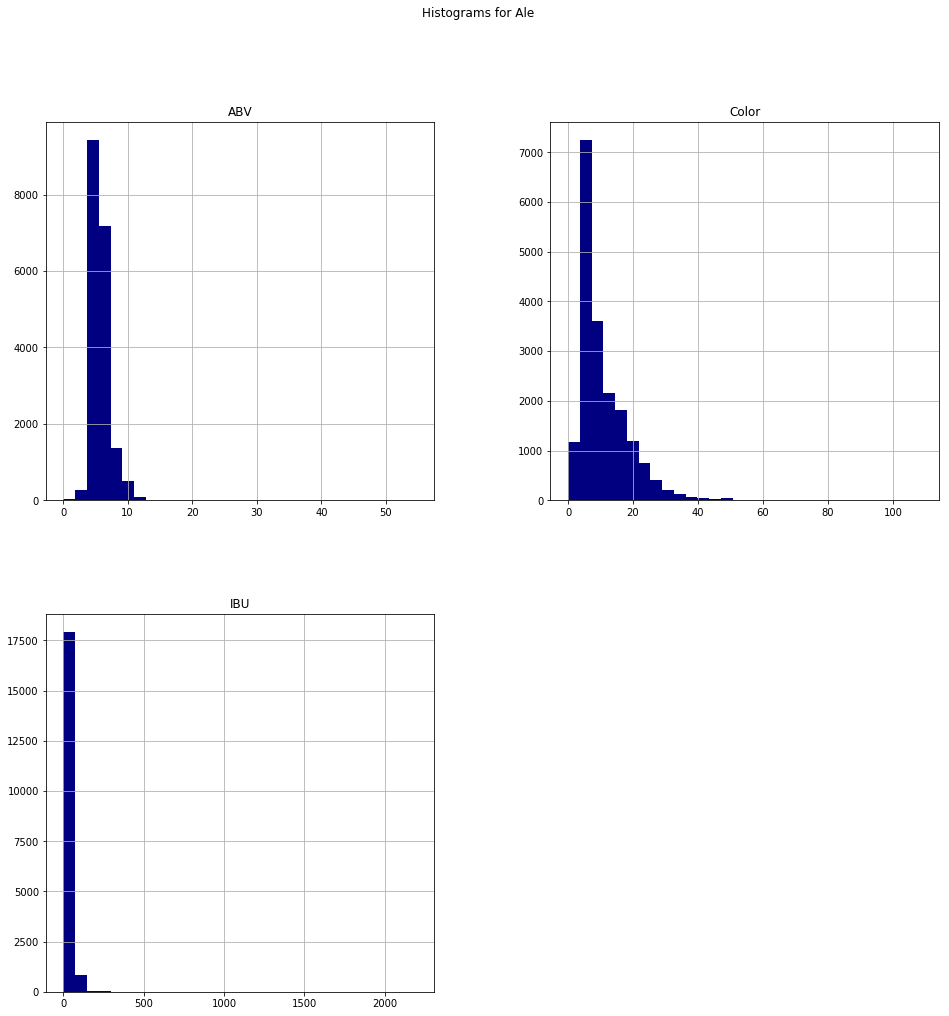

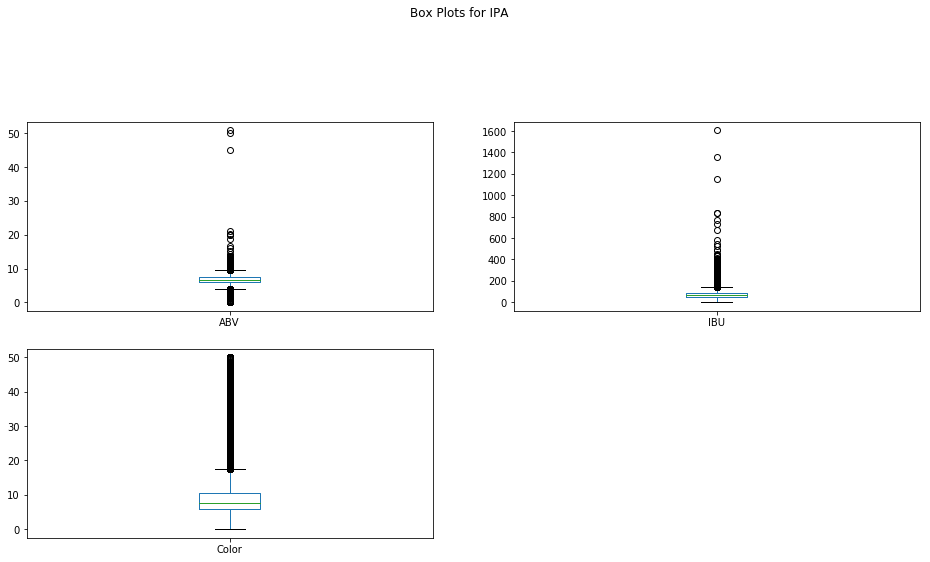

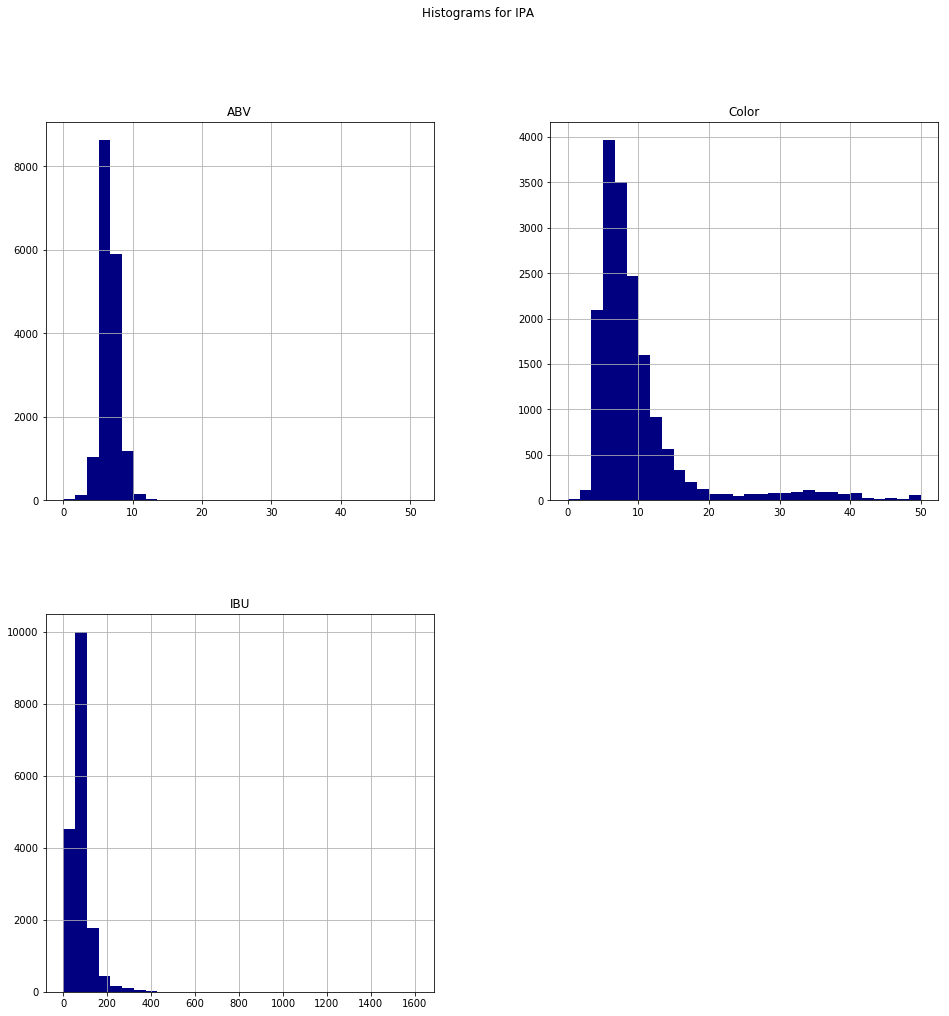

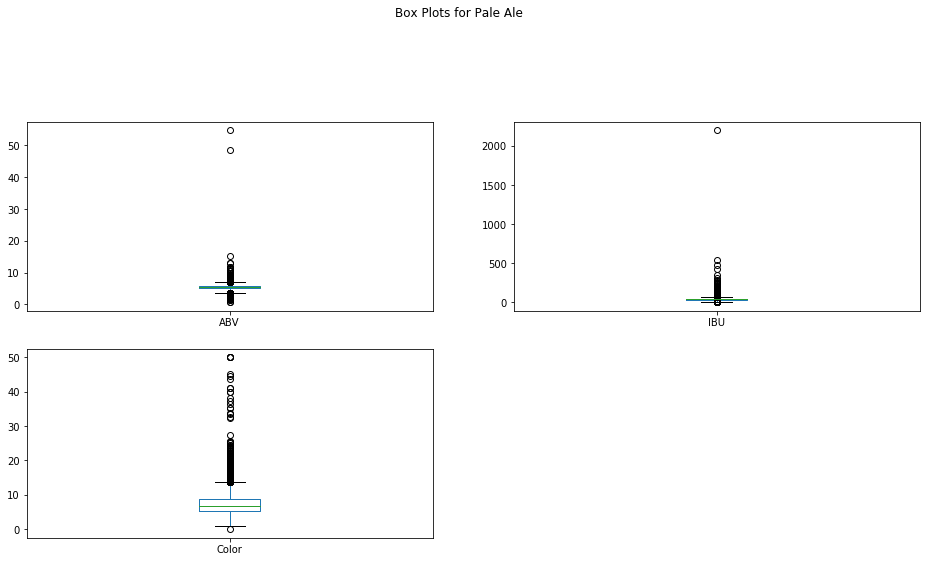

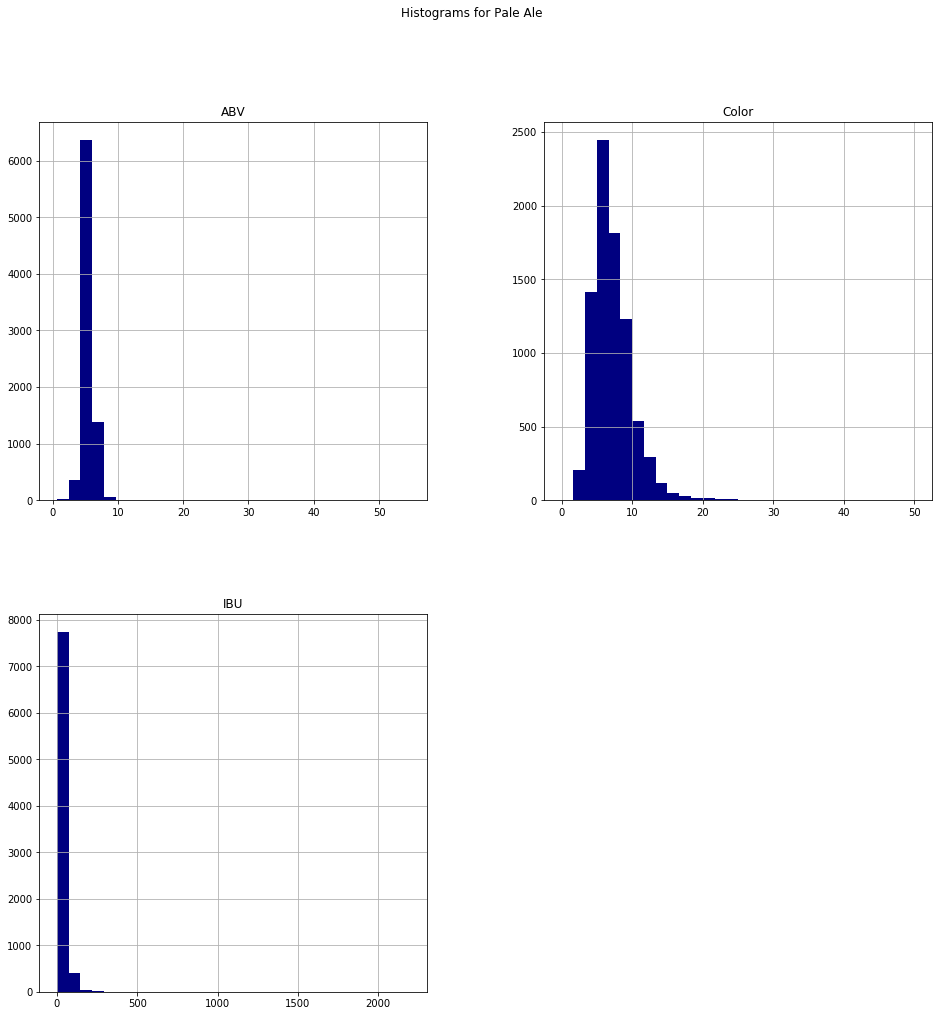

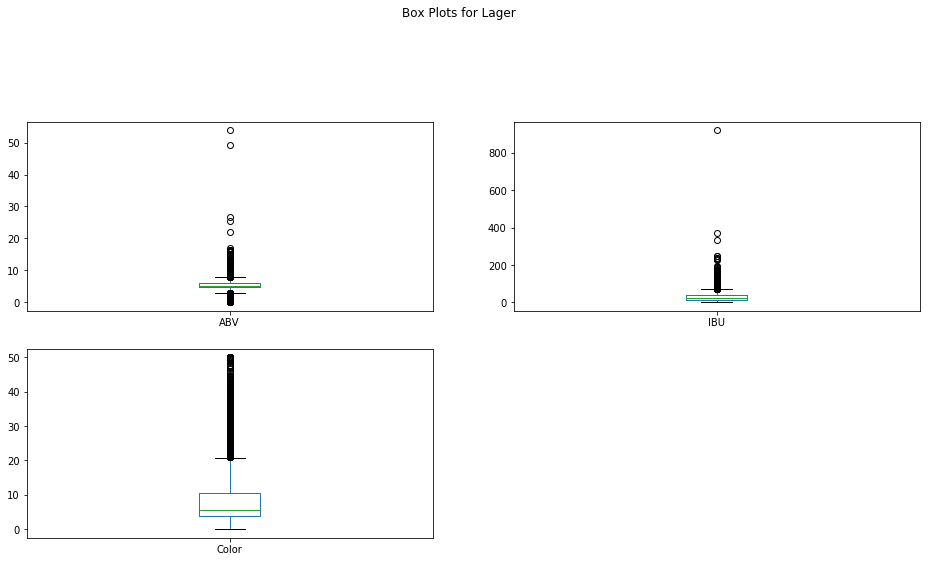

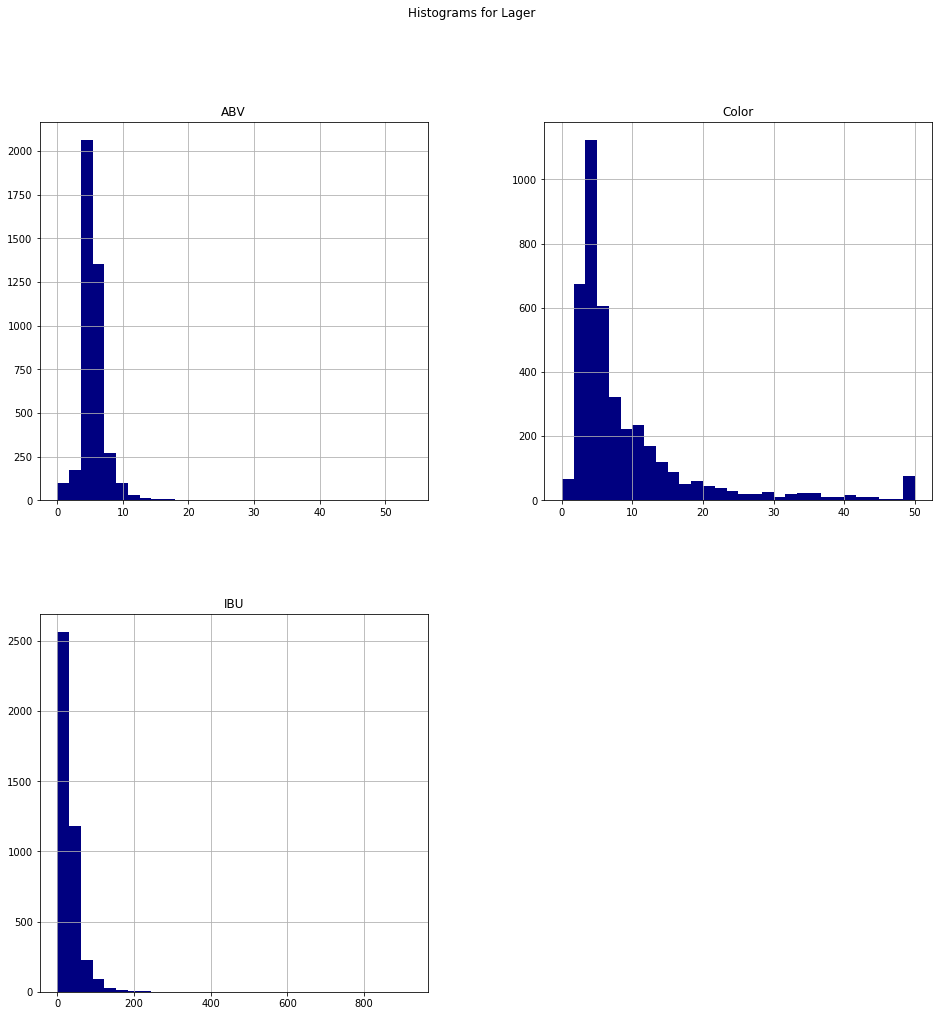

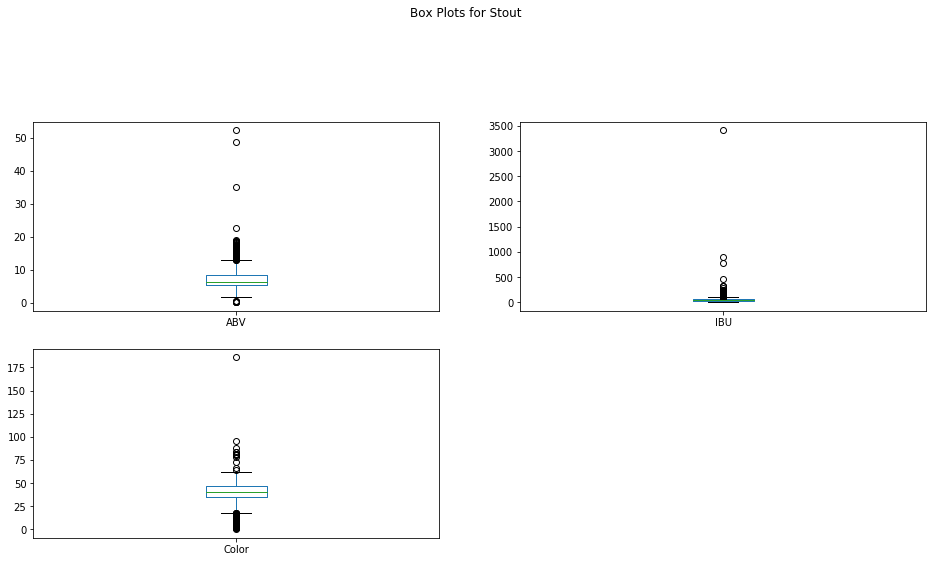

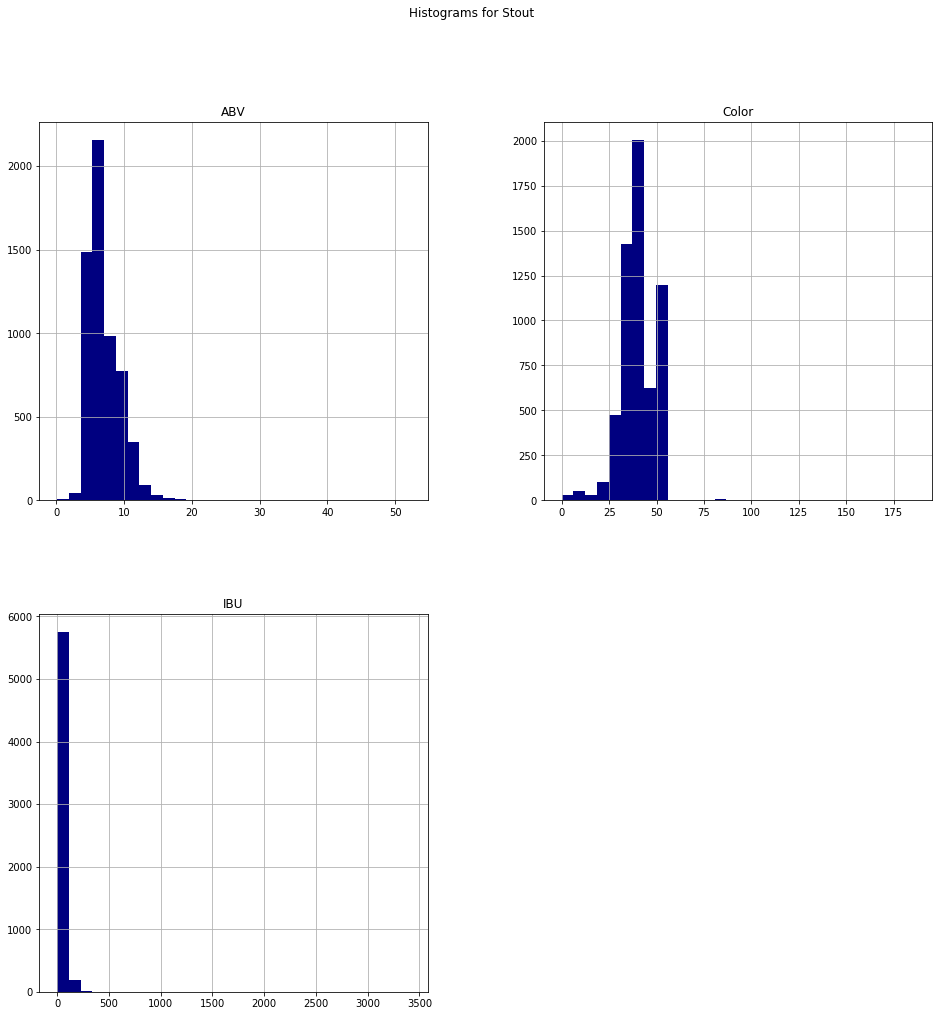

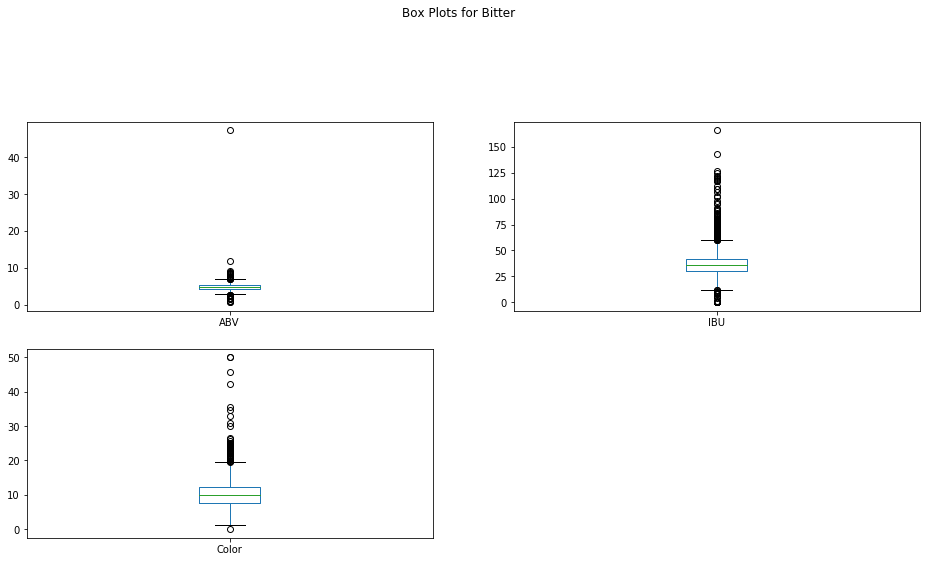

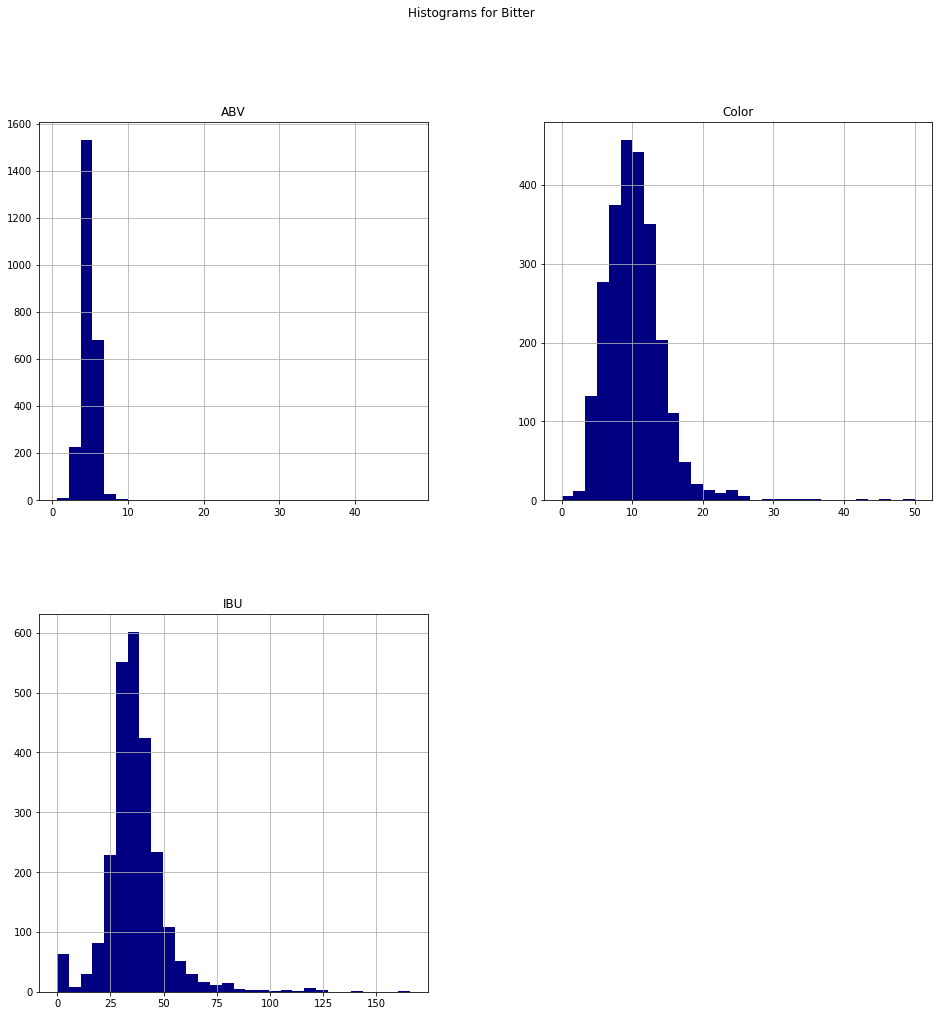

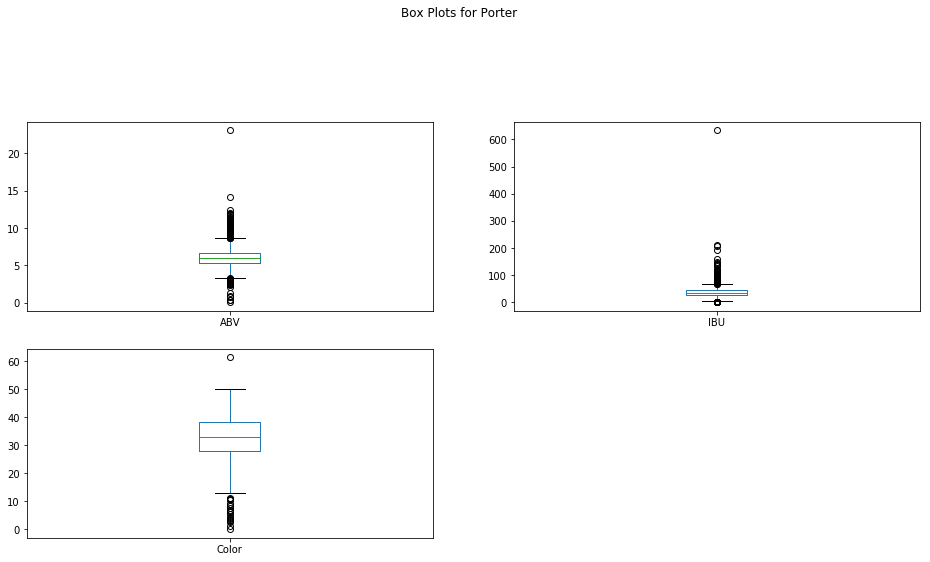

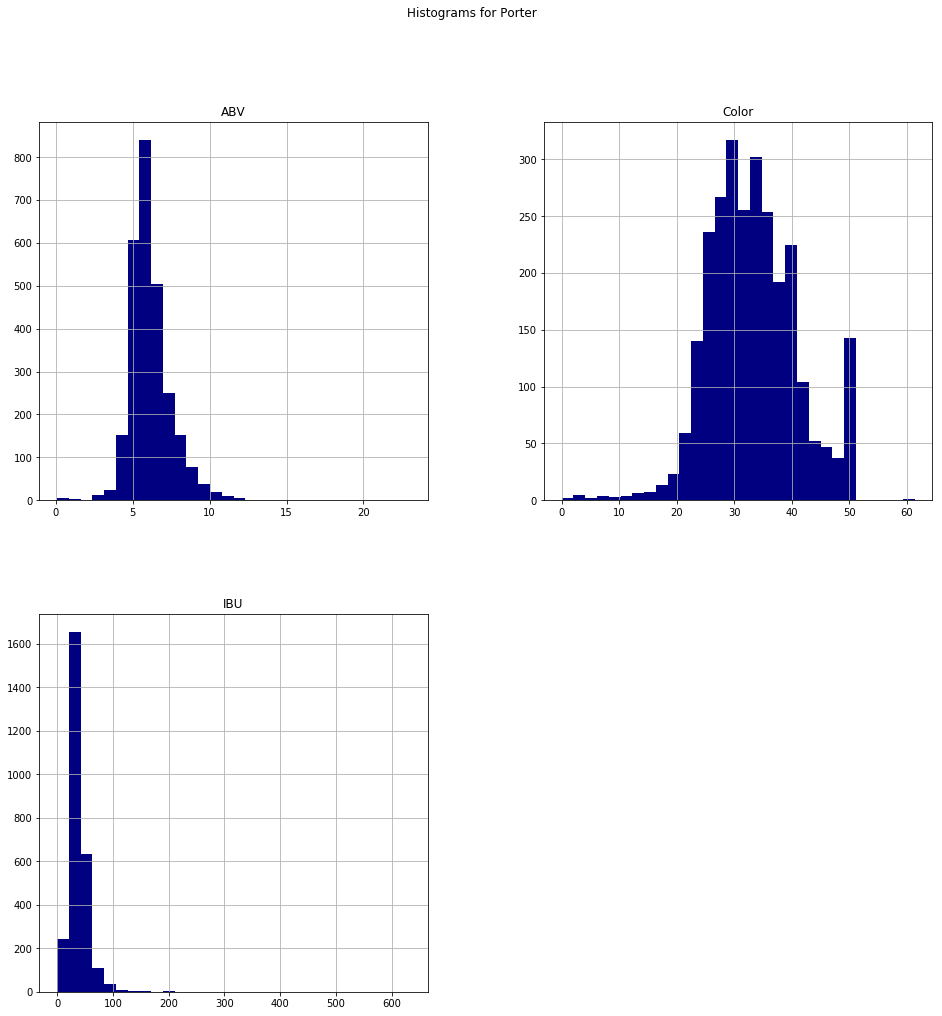

In [60]:
dfStyleAndNumeric = dfClean[['Style', 'ABV', 'IBU', 'Color']]

general_styles = ['Ale', 'IPA', 'Pale Ale', 'Lager', 'Stout', 'Bitter', 'Porter']

for style in general_styles:
    dfForStyle = dfStyleAndNumeric[dfStyleAndNumeric['Style'].str.contains(style)]
    dfForStyle.plot(kind='box', subplots=True, layout=(4,2), sharex=False,
                    sharey=False, figsize=(16,16), title='Box Plots for {}'.format(style))
    dfForStyle.hist(bins=30, figsize=(16,16), color='navy')
    plt.suptitle('Histograms for {}'.format(style))
    plt.show()

In [61]:
dfStyleAndNumeric = dfClean[['Style', 'ABV', 'IBU', 'Color']]

general_styles = ['Ale', 'IPA', 'Pale Ale', 'Lager', 'Stout', 'Bitter', 'Porter']

for style in general_styles:
    print('Stats for {}'.format(style))
    print(dfStyleAndNumeric[dfStyleAndNumeric['Style'].str.contains(style)].describe())

Stats for Ale
                ABV           IBU         Color
count  18858.000000  18858.000000  18858.000000
mean       5.776540     37.165129     10.664981
std        1.468516     28.990633      7.408094
min        0.060000      0.000000      0.000000
25%        4.990000     24.410000      5.310000
50%        5.500000     34.010000      7.980000
75%        6.160000     44.177500     14.410000
max       54.720000   2197.070000    108.650000
Stats for IPA
                ABV           IBU         Color
count  17064.000000  17064.000000  17064.000000
mean       6.706668     76.712765      9.849520
std        1.397430     50.072863      7.356278
min        0.000000      0.000000      0.000000
25%        5.960000     52.507500      5.950000
50%        6.580000     67.205000      7.710000
75%        7.350000     88.740000     10.562500
max       50.860000   1605.830000     50.000000
Stats for Pale Ale
               ABV          IBU        Color
count  8206.000000  8206.000000  8206.000000

In [62]:
dfGeneralStyles = dfClean[dfClean['Style'].str.contains('|'.join(general_styles))]
for style in general_styles:
    dfGeneralStyles.loc[dfGeneralStyles['Style'].str.contains(style), 'Style'] = style

C:\Users\kamra_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


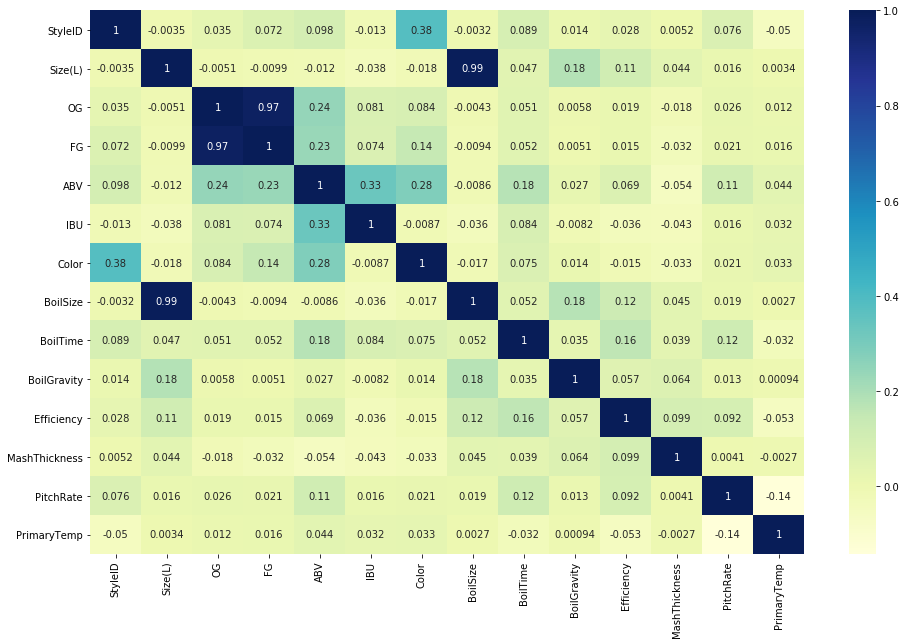

In [333]:
plt.subplots(figsize=(16, 10))
sns.heatmap(dfGeneralStyles.corr(), annot=True, cmap="YlGnBu")
plt.show()

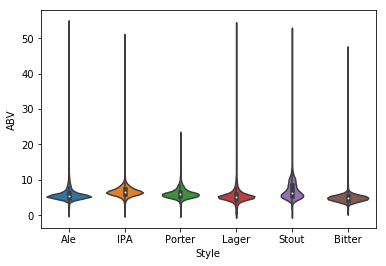

In [63]:
sns.violinplot(x='Style', y='ABV',data=dfGeneralStyles, figsize=(16,16))
plt.show()

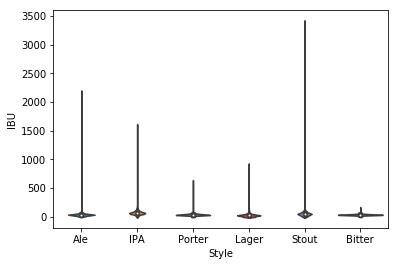

In [64]:
sns.violinplot(x='Style', y='IBU',data=dfGeneralStyles, figsize=(16,16))
plt.show()

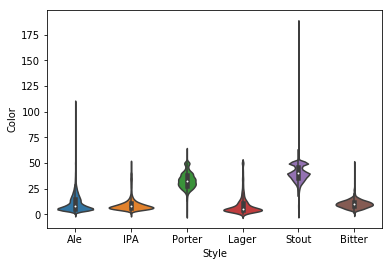

In [65]:
sns.violinplot(x='Style', y='Color',data=dfGeneralStyles, figsize=(16,16))
plt.show()

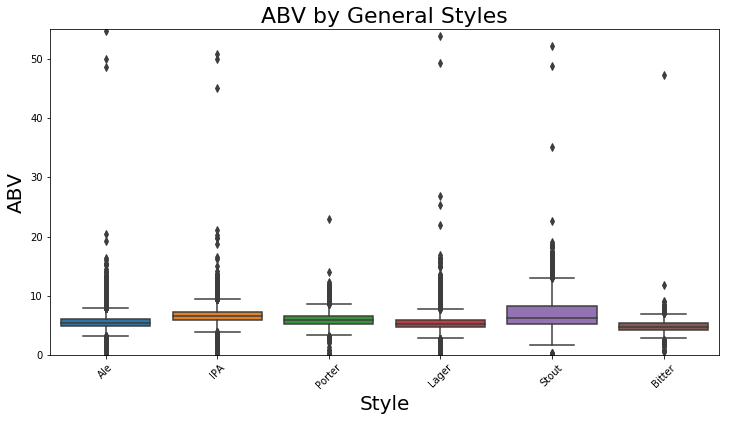

In [66]:
order = dfGeneralStyles.groupby('Style')['ABV'].median().fillna(0).sort_values()[::-1].index
plt.figure(figsize=(12,6))
sns.boxplot(dfGeneralStyles['Style'], dfGeneralStyles['ABV'])
plt.xticks(rotation=45)
plt.ylim(0,55)
plt.title('ABV by General Styles', fontsize=22)
plt.xlabel('Style', fontsize=20)
plt.ylabel('ABV', fontsize=20)
plt.show()

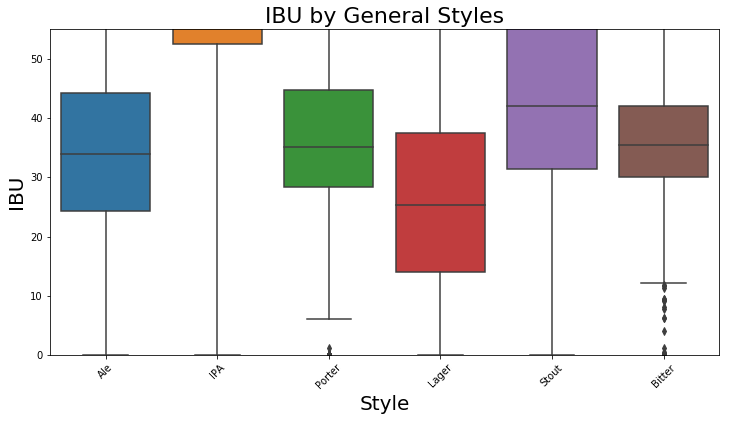

In [67]:
order = dfGeneralStyles.groupby('Style')['IBU'].median().fillna(0).sort_values()[::-1].index

plt.figure(figsize=(12,6))
sns.boxplot(dfGeneralStyles['Style'], dfGeneralStyles['IBU'])
plt.xticks(rotation=45)
plt.ylim(0,55)
plt.title('IBU by General Styles', fontsize=22)
plt.xlabel('Style', fontsize=20)
plt.ylabel('IBU', fontsize=20)
plt.show()

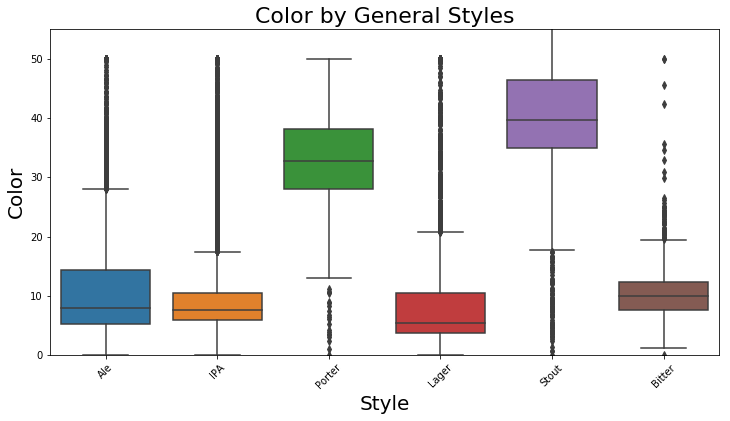

In [68]:
order = dfGeneralStyles.groupby('Style')['Color'].median().fillna(0).sort_values()[::-1].index

plt.figure(figsize=(12,6))
sns.boxplot(dfGeneralStyles['Style'], dfGeneralStyles['Color'])
plt.xticks(rotation=45)
plt.ylim(0,55)
plt.title('Color by General Styles', fontsize=22)
plt.xlabel('Style', fontsize=20)
plt.ylabel('Color', fontsize=20)
plt.show()

<div style="font-size:16px; color:darkblue;">
    IPA Analysis<br/>
    Due to the common roots of IPA beers (https://en.wikipedia.org/wiki/India_pale_ale) we expect a strong correlation between the IPA styles for different attributes. We picked American IPA and American Pale Ale as an example, but the analysis could apply to other IPAs as well. We want to investigate if the data is supporting the common root of the IPA beer family.
</div>

In [69]:
dfClean['OG-FG']=dfClean['OG']-dfClean['FG']

In [70]:
dfClean.head(5)

,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,OG-FG
0,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,1.5,Specific Gravity,All Grain,0.75,17.78,0.042
1,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,1.5,Specific Gravity,All Grain,0.75,20.00,0.062
2,Zombie Dust Clone - EXTRACT,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.047,70.0,1.5,Specific Gravity,extract,0.75,20.00,0.045
3,Zombie Dust Clone - ALL GRAIN,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.047,70.0,1.5,Specific Gravity,All Grain,0.75,20.00,0.044
4,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,1.5,Specific Gravity,All Grain,0.75,19.00,0.050


In [71]:
df1 = dfClean[dfClean['Style']=='American IPA']
df2 = dfClean[dfClean['Style']=='American Pale Ale']
dfcp = pd.concat([df1, df2])

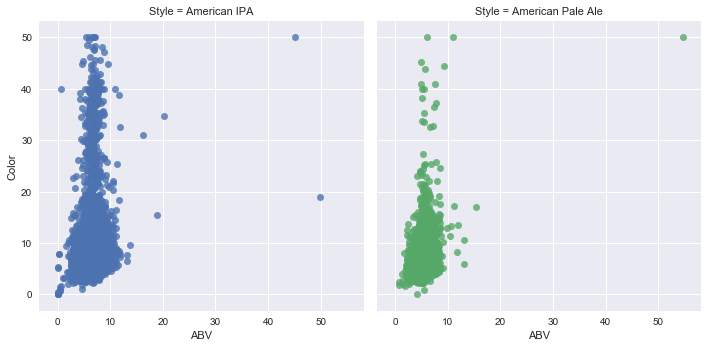

In [72]:
sns.set(color_codes=True)
sns.lmplot(x='ABV', y='Color', data=dfcp, hue='Style', fit_reg = False, col='Style')

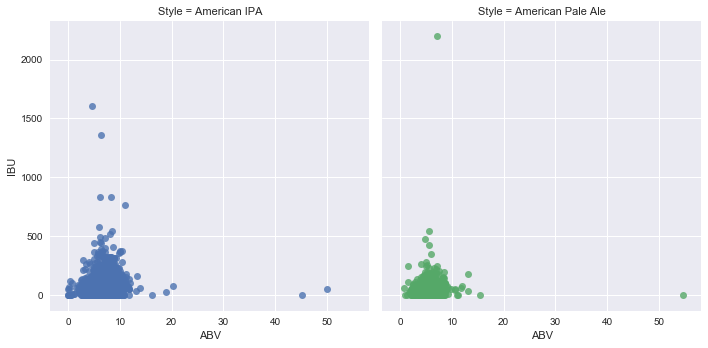

In [73]:
sns.lmplot(x='ABV', y='IBU', data=dfcp, hue='Style', fit_reg = False, col='Style')

In [74]:
dfcp['OG-FG'].describe()
outlier = dfcp['OG-FG'].mean() + 5*dfcp['OG-FG'].std()
dfcp = dfcp[dfcp['OG-FG'] < outlier]

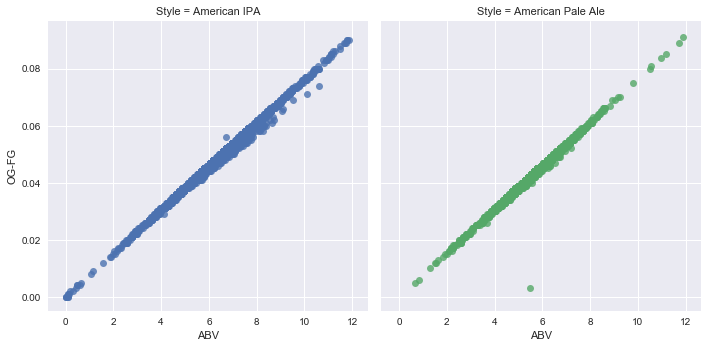

In [75]:
sns.lmplot(x='ABV', y='OG-FG', data=dfcp, hue='Style', fit_reg = False, col='Style')

<div style="font-size:16px; color:darkblue;">
    Comparison of different style classification models.
</div>

In [111]:
training_results = pd.DataFrame(columns=['All', 'ABV', 'IBU', 'Color'])
testing_results = pd.DataFrame(columns=['All', 'ABV', 'IBU', 'Color'])

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    dfClean[['ABV', 'IBU', 'Color']], dfClean['StyleID'], random_state=0)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
training_results.loc['LogisticRegression', 'All'] = logreg.score(X_train, y_train)
testing_results.loc['LogisticRegression', 'All'] = logreg.score(X_test, y_test)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
training_results.loc['Decision Tree', 'All'] = clf.score(X_train, y_train)
testing_results.loc['Decision Tree', 'All'] = clf.score(X_test, y_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
training_results.loc['K-NN', 'All'] = knn.score(X_train, y_train)
testing_results.loc['K-NN', 'All'] = knn.score(X_test, y_test)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
training_results.loc['Linear Discriminant', 'All'] = lda.score(X_train, y_train)
testing_results.loc['Linear Discriminant', 'All'] = lda.score(X_test, y_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
training_results.loc['Gaussian Naive Bayes', 'All'] = gnb.score(X_train, y_train)
testing_results.loc['Gaussian Naive Bayes', 'All'] = gnb.score(X_test, y_test)

svm = SVC()
svm.fit(X_train, y_train)
training_results.loc['SVM', 'All'] = svm.score(X_train, y_train)
testing_results.loc['SVM', 'All'] = svm.score(X_test, y_test)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    dfClean[['ABV']], dfClean['StyleID'], random_state=0)
training_data = pd.Series()
testing_data = pd.Series()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
training_results.loc['LogisticRegression', 'ABV'] = logreg.score(X_train, y_train)
testing_results.loc['LogisticRegression', 'ABV'] = logreg.score(X_test, y_test)

clf = DecisionTreeClassifier().fit(X_train, y_train)
training_results.loc['Decision Tree', 'ABV'] = clf.score(X_train, y_train)
testing_results.loc['Decision Tree', 'ABV'] = clf.score(X_test, y_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
training_results.loc['K-NN', 'ABV'] = knn.score(X_train, y_train)
testing_results.loc['K-NN', 'ABV'] = knn.score(X_test, y_test)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
training_results.loc['Linear Discriminant', 'ABV'] = lda.score(X_train, y_train)
testing_results.loc['Linear Discriminant', 'ABV'] = lda.score(X_test, y_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
training_results.loc['Gaussian Naive Bayes', 'ABV'] = gnb.score(X_train, y_train)
testing_results.loc['Gaussian Naive Bayes', 'ABV'] = gnb.score(X_test, y_test)

svm = SVC()
svm.fit(X_train, y_train)
training_results.loc['SVM', 'ABV'] = svm.score(X_train, y_train)
testing_results.loc['SVM', 'ABV'] = svm.score(X_test, y_test)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    dfClean[['IBU']], dfClean['StyleID'], random_state=0)
training_data = pd.Series()
testing_data = pd.Series()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
training_results.loc['LogisticRegression', 'IBU'] = logreg.score(X_train, y_train)
testing_results.loc['LogisticRegression', 'IBU'] = logreg.score(X_test, y_test)

clf = DecisionTreeClassifier().fit(X_train, y_train)
training_results.loc['Decision Tree', 'IBU'] = clf.score(X_train, y_train)
testing_results.loc['Decision Tree', 'IBU'] = clf.score(X_test, y_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
training_results.loc['K-NN', 'IBU'] = knn.score(X_train, y_train)
testing_results.loc['K-NN', 'IBU'] = knn.score(X_test, y_test)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
training_results.loc['Linear Discriminant', 'IBU'] = lda.score(X_train, y_train)
testing_results.loc['Linear Discriminant', 'IBU'] = lda.score(X_test, y_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
training_results.loc['Gaussian Naive Bayes', 'IBU'] = gnb.score(X_train, y_train)
testing_results.loc['Gaussian Naive Bayes', 'IBU'] = gnb.score(X_test, y_test)

svm = SVC()
svm.fit(X_train, y_train)
training_results.loc['SVM', 'IBU'] = svm.score(X_train, y_train)
testing_results.loc['SVM', 'IBU'] = svm.score(X_test, y_test)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    dfClean[['Color']], dfClean['StyleID'], random_state=0)
training_data = pd.Series()
testing_data = pd.Series()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
training_results.loc['LogisticRegression', 'Color'] = logreg.score(X_train, y_train)
testing_results.loc['LogisticRegression', 'Color'] = logreg.score(X_test, y_test)

clf = DecisionTreeClassifier().fit(X_train, y_train)
training_results.loc['Decision Tree', 'Color'] = clf.score(X_train, y_train)
testing_results.loc['Decision Tree', 'Color'] = clf.score(X_test, y_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
training_results.loc['K-NN', 'Color'] = knn.score(X_train, y_train)
testing_results.loc['K-NN', 'Color'] = knn.score(X_test, y_test)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
training_results.loc['Linear Discriminant', 'Color'] = lda.score(X_train, y_train)
testing_results.loc['Linear Discriminant', 'Color'] = lda.score(X_test, y_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
training_results.loc['Gaussian Naive Bayes', 'Color'] = gnb.score(X_train, y_train)
testing_results.loc['Gaussian Naive Bayes', 'Color'] = gnb.score(X_test, y_test)

svm = SVC()
svm.fit(X_train, y_train)
training_results.loc['SVM', 'Color'] = svm.score(X_train, y_train)
testing_results.loc['SVM', 'Color'] = svm.score(X_test, y_test)

In [119]:
training_results = 100 * training_results
training_results

,All,ABV,IBU,Color
LogisticRegression,20.9723,17.0669,16.979,17.8839
Decision Tree,99.9377,23.0936,34.8189,27.1363
K-NN,44.925,15.8524,26.8194,21.9871
Linear Discriminant,26.1655,18.8053,19.8329,18.6294
Gaussian Naive Bayes,27.4368,20.5693,19.3072,16.1309
SVM,41.0507,21.2819,23.2932,20.2671


In [120]:
testing_results = 100 * testing_results
testing_results

,All,ABV,IBU,Color
LogisticRegression,20.8496,17.1182,16.7335,17.9041
Decision Tree,20.8331,20.0967,15.7718,17.404
K-NN,27.598,13.8265,16.2334,15.2168
Linear Discriminant,25.8669,18.7119,19.4867,18.7503
Gaussian Naive Bayes,27.1748,20.0747,18.9262,15.9037
SVM,32.4999,20.9375,22.806,20.0528


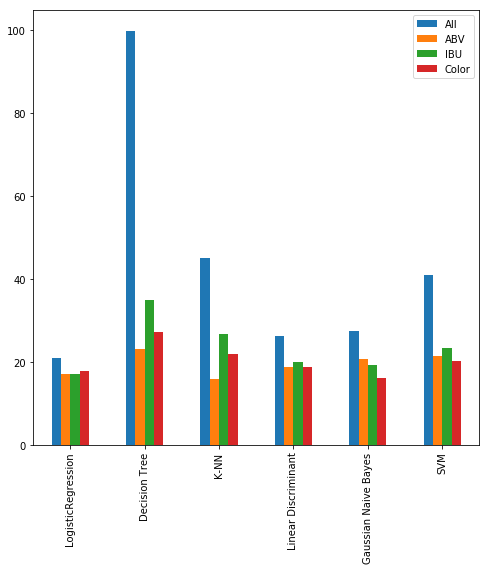

In [127]:
training_results.plot.bar(figsize=(8,8))

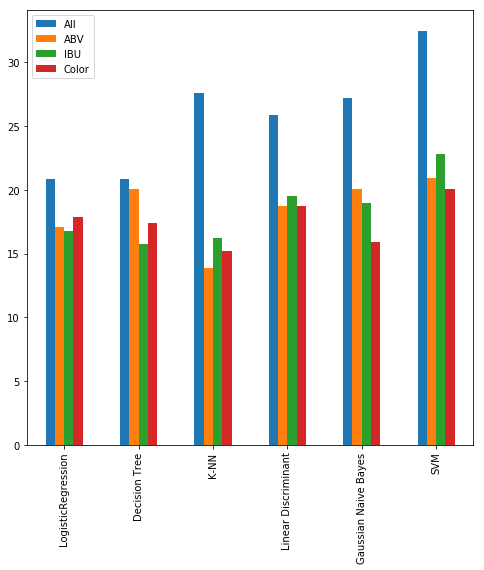

In [128]:
testing_results.plot.bar(figsize=(8,8))